<a href="https://colab.research.google.com/github/positivejmk/2021-2-practice/blob/master/NH_stock_holding%20duration_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
%matplotlib inline
import pandas as pd
pd.set_option("display.max_row", 100)
pd.set_option("display.max_column", 100)
import numpy as np
import os
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
plt.rcParams['figure.figsize'] = [10, 5]

from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error as mse
from sklearn.model_selection import train_test_split, StratifiedKFold, KFold
from lightgbm import LGBMRegressor

In [ ]:
#한글 폰트 적용
!apt-get update -qq
!apt-get install fonts-nanum* -qq

In [ ]:
sys_font = fm.findSystemFonts()
print(f"sys_font number: {len(sys_font)}")

sys_font number: 48


In [ ]:
nanum_font = [f for f in sys_font if 'Nanum' in f]

In [ ]:
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

In [ ]:
mpl.rcParams['axes.unicode_minus'] = False

In [ ]:
path = '/usr/share/fonts/truetype/nanum/NanumGothicEco.ttf'

In [ ]:
font_name = fm.FontProperties(fname=path, size=10).get_name()
print(font_name)

NanumGothic Eco


In [ ]:
plt.rc('font', family = font_name)

In [ ]:
fm._rebuild()

In [ ]:
cus = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/2021년(제2회) NH투자증권 빅데이터 경진대회/cus_info.csv")
iem = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/2021년(제2회) NH투자증권 빅데이터 경진대회/iem_info_20210902.csv")
hist = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/2021년(제2회) NH투자증권 빅데이터 경진대회/stk_bnc_hist.csv")
train = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/2021년(제2회) NH투자증권 빅데이터 경진대회/stk_hld_train.csv')

In [ ]:
train_data = pd.merge(train, cus, how = "left", on = ["act_id"])
train_data = pd.merge(train_data, iem, how = "left", on = ["iem_cd"])

In [ ]:
train_data.head(3)

,act_id,iem_cd,byn_dt,hold_d,sex_dit_cd,cus_age_stn_cd,ivs_icn_cd,cus_aet_stn_cd,mrz_pdt_tp_sgm_cd,lsg_sgm_cd,tco_cus_grd_cd,tot_ivs_te_sgm_cd,mrz_btp_dit_cd,iem_krl_nm,btp_cfc_cd,mkt_pr_tal_scl_tp_cd,stk_dit_cd
0,0ad104dbed99be0cd858aa772765ddedade554601a981b...,A006360,20180726,11,1,9,3,2,2,9,5,5,8,GS건설,1,1,1
1,0ad104dbed99be0cd858aa772765ddedade554601a981b...,A005930,20180131,80,1,9,3,2,2,9,5,5,8,삼성전자,9,1,1
2,0ad104dbed99be0cd858aa772765ddedade554601a981b...,A005070,20180517,5,1,9,3,2,2,9,5,5,8,코스모신소재,12,2,99


In [ ]:
df = train_data

In [ ]:
multiple1 = df.groupby(['sex_dit_cd','cus_age_stn_cd'])['hold_d'].mean()
#multiple1['M':'F']
multiple1
#2-5 (40-45세미만 여성이 보유기간 약 25로 가장 높았으며, 60-65세미만 남성과 20-25세미만 남성이 약 13일 정도로 가장 낮았다. )

sex_dit_cd  cus_age_stn_cd
1           1                 13.880440
            2                 14.915067
            3                 18.601468
            4                 18.879307
            5                 22.595936
            6                 22.671031
            7                 15.904799
            8                 17.522163
            9                 13.003823
2           1                 18.425155
            2                 21.509849
            3                 24.971715
            4                 23.266956
            5                 24.072159
            6                 20.412800
            7                 18.198908
            8                 18.962125
            9                 20.469325
Name: hold_d, dtype: float64

In [ ]:
#고객 및 주거래계좌 정보와 보유기간 

In [ ]:
#성별
grouped1 = df['hold_d'].groupby(df['sex_dit_cd'])

In [ ]:
g1 = grouped1.mean()
g1
# 1 남성 2 여성
#여성이 남성보다 보유기간이 길었다.

sex_dit_cd
1    18.677614
2    21.354381
Name: hold_d, dtype: float64

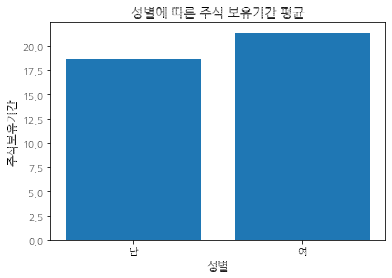

In [ ]:
plt.bar(['남','여'],g1)
plt.title('성별에 따른 주식 보유기간 평균', fontsize=13)
plt.xlabel('성별', fontsize=12)
plt.ylabel('주식보유기간', fontsize=12)
plt.show()

In [ ]:
#연령구간
grouped2 = df['hold_d'].groupby(df['cus_age_stn_cd'])

In [ ]:
g2 = grouped2.mean()
g2
# 01: 20세~25세미만
# 02: 25세~30세미만
# 03: 30세~35세미만
# 04: 35세~40세미만
# 05: 40세~45세미만
# 06: 45세~50세미만
# 07: 50세~55세미만
# 08: 55세~60세미만
# 09: 60세~65세미만

# 40세~45세 미만 연령 구간이 가장 길게 보유했으며, 60세~65세 미만 연령 구간이 가장 짧게 보유했다.

cus_age_stn_cd
1    15.285900
2    17.148652
3    20.588914
4    20.279309
5    23.083953
6    21.952967
7    16.902997
8    18.099228
9    14.993685
Name: hold_d, dtype: float64

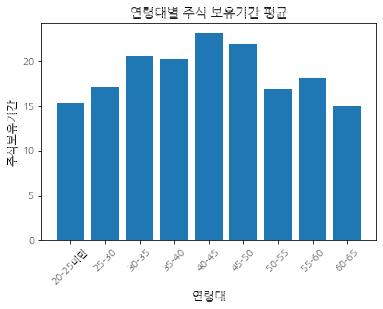

In [ ]:
plt.bar(['20-25미만','25-30','30-35','35-40','40-45','45-50','50-55','55-60','60-65'],g2)
plt.title('연령대별 주식 보유기간 평균', fontsize=13)
plt.xlabel('연령대', fontsize=12)
plt.ylabel('주식보유기간', fontsize=12)
plt.xticks(rotation=45)
plt.show()

In [ ]:
#투자성향
grouped3 = df['hold_d'].groupby(df['ivs_icn_cd'])

In [ ]:
g3 = grouped3.mean()
g3
# 01: 안정형
# 02: 안정추구형
# 03: 위험중립형
# 04: 적극투자형
# 05: 공격투자형
# 09: 전문투자가형
# 00: 정보제공미동의
# 99: 미정의

#0-정보제공미동의/99-미동의 제외
#전문투자가형이 가장 오래 보유했으며, 안정형이 가장 짧게 보유했다.

ivs_icn_cd
0     22.516752
1     12.944112
2     16.454892
3     17.103244
4     19.741460
5     22.818877
9     29.513699
99    22.361541
Name: hold_d, dtype: float64

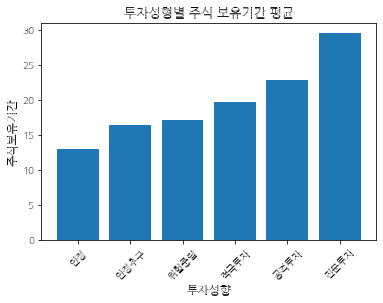

In [ ]:
plt.bar(['안정','안정추구','위험중립','적극투자','공격투자','전문투자'],g3[1:-1])
plt.title('투자성형별 주식 보유기간 평균', fontsize=13)
plt.xlabel('투자성향', fontsize=12)
plt.ylabel('주식보유기간', fontsize=12)
plt.xticks(rotation=45)
plt.show()

In [ ]:
#고객자산구간
grouped4 = df['hold_d'].groupby(df['cus_aet_stn_cd'])

In [ ]:
g4 = grouped4.mean()
g4
# 01: 0원이상-1천만원미만
# 02: 1천만원이상-3천만원미만
# 03: 3천만원이상-5천만원미만
# 04: 5천만원이상-1억원미만
# 05: 1억원이상-3억원미만
# 06: 3억원이상

#고객 총자산 구간이 높을수록 보유기간이 길었다.

cus_aet_stn_cd
1    16.443982
2    18.715247
3    17.975862
4    19.885230
5    25.948949
6    25.704958
Name: hold_d, dtype: float64

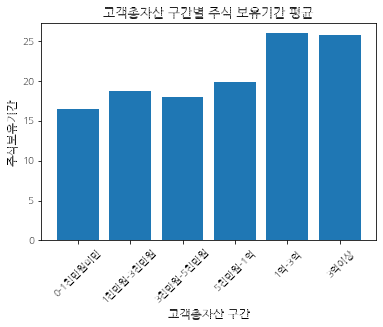

In [ ]:
plt.bar(['0-1천만원미만','1천만원-3천만원','3천만원-5천만원','5천만원-1억','1억-3억','3억이상'],g4)
plt.title('고객총자산 구간별 주식 보유기간 평균', fontsize=13)
plt.xlabel('고객총자산 구간', fontsize=12)
plt.ylabel('주식보유기간', fontsize=12)
plt.xticks(rotation=45)
plt.show()

In [ ]:
#주거래 상품군
grouped5 = df['hold_d'].groupby(df['mrz_pdt_tp_sgm_cd'])

In [ ]:
df['mrz_pdt_tp_sgm_cd'].unique()

array([ 2,  8, 15, 11,  3,  6, 12,  1,  9, 10,  5])

In [ ]:
g5 = grouped5.mean()
g5
# 01: Only CMA
# 02: 국내주식
# 03: 해외주식
# 04: 선물옵션
# 05: 금속
# 06: 국내채권
# 07: 해외채권
# 08: 펀드
# 09: ELS/DLS
# 10: 신탁_퇴직연금
# 11: RP
# 12: 발행어음
# 14: WRAP
# 15: 신용대출
# 99: 미정의

#4 : 선물옵션, 7 : 해외채권, 14 : WRAP, 99 : 미정의 는 관측된 결과가 아예 없음.
#국내채권이 독보적으로 거래기간이 길었으며, 신용대출과 CMA가 독보적으로 거래기간이 짧았다.

mrz_pdt_tp_sgm_cd
1      6.951282
2     19.608072
3     21.946749
5     26.215909
6     90.538462
8     40.977528
9     16.164021
10    34.745946
11    41.869565
12    64.538462
15     5.734026
Name: hold_d, dtype: float64

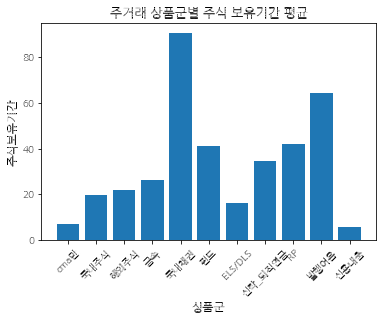

In [ ]:
plt.bar(['cma만','국내주식','해외주식','금속','국내채권','펀드','ELS/DLS','신탁_퇴직연금','RP','발행어음','신용대출'], 
       g5)
plt.title('주거래 상품군별 주식 보유기간 평균', fontsize=13)
plt.xlabel('상품군', fontsize=12)
plt.ylabel('주식보유기간', fontsize=12)
plt.xticks(rotation=45)
plt.show()

In [ ]:
#Life stage
grouped6 = df['hold_d'].groupby(df['lsg_sgm_cd'])

In [ ]:
g6 = grouped6.mean()
g6
# 02: 사회초년생 (20-29세)
# 03: 가족형성기_남자 (30-39세 & 남자)
# 04: 가족형성기_여자 (30-39세 & 여자)
# 05: 가족성숙기_직장인 (40-59세 & 직장인 & 남자)
# 06: 가족성숙기_주부 (40-59세 & 주부 & 여자 )
# 07: 가족성숙기_남자 (40-59세 & 기타 & 남자 )
# 08: 가족성숙기_여자 (40-59세 & 기타 & 여자)
# 09: 은퇴기 (60-69세)

#가족형성기_여자의 클래스가 가장 보유 기간이 길었으며, 사회초년생이 보유 기간이 가장 짧음.

lsg_sgm_cd
2    16.782481
3    18.757898
4    24.000614
5    20.917437
6    19.536418
7    19.848741
8    18.276048
9    14.987741
Name: hold_d, dtype: float64

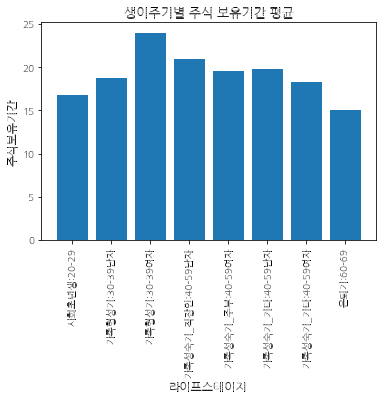

In [ ]:
plt.bar(['사회초년생:20-29','가족형성기:30-39남자','가족형성기:30-39여자','가족성숙기_직장인:40-59남자','가족성숙기_주부:40-59여자',
         '가족성숙기_기타:40-59남자','가족성숙기_기타:40-59여자','은퇴기:60-69'], g6)
plt.title('생이주기별 주식 보유기간 평균', fontsize=13)
plt.xlabel('라이프스테이지', fontsize=12)
plt.ylabel('주식보유기간', fontsize=12)
plt.xticks(rotation=90)
plt.show()

In [ ]:
#고객등급
grouped7 = df['hold_d'].groupby(df['tco_cus_grd_cd'])

In [ ]:
g7 = grouped7.mean()
g7

# 자산 및 수익 기준 고객의 등급을 부여
# 01: 탑클래스 (자산1)10억이상 or 수익기여도2) 5백만원 이상)
# 02: 골드 (자산3억이상 or 수익기여도 3백만원 이상)
# 03: 로얄 (자산1억이상 or 수익기여도 1백만원 이상)
# 04: 그린 (자산3천이상 or 수익기여도 5십만원 이상)
# 05: 블루 (자산1천이상 or 수익기여도 1십만원 이상)
# 09: 등급 미정의
# 99: 미정의 (결측치)

#"고객자산구간"과 달리 수익정보가 포함되어 있음. 
#결측치와 미정의를 제외하고 골드 클래스가 가장 보유기간이 길었고, 블루 클래스가 가장 짧았다.


tco_cus_grd_cd
1     21.298104
2     25.237621
3     22.141544
4     19.228788
5     17.702088
9     18.814454
99     6.010101
Name: hold_d, dtype: float64

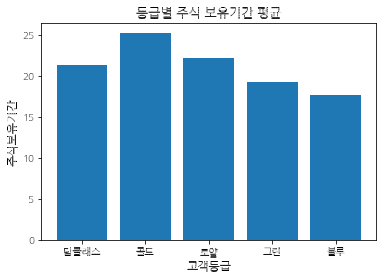

In [ ]:
plt.bar(['탑클래스','골드','로얄','그린','블루'], g7[:-2])
plt.title('등급별 주식 보유기간 평균', fontsize=13)
plt.xlabel('고객등급', fontsize=12)
plt.ylabel('주식보유기간', fontsize=12)
#plt.xticks(rotation=45)
plt.show()

In [ ]:
#총투자기간
grouped8 = df['hold_d'].groupby(df['tot_ivs_te_sgm_cd'])

In [ ]:
g8 = grouped8.mean()
g8
# 계좌를 개설한 이래 고객이 100만원 이상 보유한 개월 수 
# 01: 6개월 미만
# 02: 6개월-1년 미만
# 03: 1년-3년 미만
# 04: 3년-5년 미만
# 05: 5년-10년 미만
# 06: 10년 이상

#3-5년일때 가장 보유기간이 길었고, 1년 미만이 가장 짧았다.

tot_ivs_te_sgm_cd
1    12.310893
2    12.556034
3    20.111816
4    26.488120
5    23.119426
6    21.441604
Name: hold_d, dtype: float64

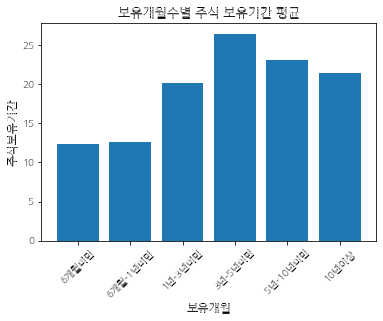

In [ ]:
plt.bar(['6개월미만','6개월-1년미만','1년-3년미만','3년-5년미만','5년-10년미만','10년이상'], g8)
plt.title('보유개월수별 주식 보유기간 평균', fontsize=13)
plt.xlabel('보유개월', fontsize=12)
plt.ylabel('주식보유기간', fontsize=12)
plt.xticks(rotation=45)
plt.show()

In [ ]:
grouped9 = df['hold_d'].groupby(df['mrz_btp_dit_cd'])

In [ ]:
g9 = grouped9.mean()
g9
# 해당월 거래 금액이 가장 큰 업종 구분 
# 01: 건설업
# 02: 금융업
# 03: 기계
# 04: 방송/통신
# 05: 서비스/오락/문화
# 06: 운송/운수
# 07: 유통
# 08: 의료/의약
# 09: 전기/전자
# 10: 제조
# 11: 철강
# 12: 화학
# 13: IT
# 14: 기타
# 15: 혼합
# 16: 비매매
# 제조업이 가장 보유 기간이 짧았으며, 비매매를 제외하고 철강산업이 가장 보유기간이 길었다.



mrz_btp_dit_cd
1     24.758744
2     22.087984
3     20.663376
4     19.087474
5     20.685079
6     20.333439
7     21.868174
8     19.437650
9     23.432756
10    14.818892
11    25.680756
12    20.994593
13    20.362778
14    23.239887
15    18.620184
16    38.934054
Name: hold_d, dtype: float64

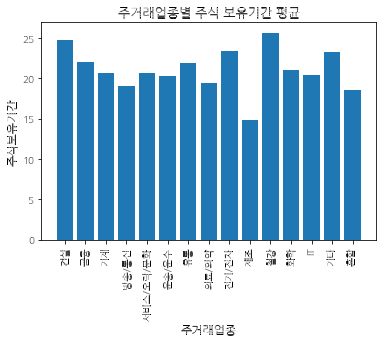

In [ ]:
#비매매 제외
plt.bar(['건설','금융','기계', '방송/통신', '서비스/오락/문화', '운송/운수', '유통', '의료/의약', '전기/전자', '제조', '철강', '화학', 'IT', '기타', '혼합'], 
        g9.iloc[0:-1])
plt.title('주거래업종별 주식 보유기간 평균', fontsize=13)
plt.xlabel('주거래업종', fontsize=12)
plt.ylabel('주식보유기간', fontsize=12)
plt.xticks(rotation=90)
plt.show()

In [ ]:
#종목정보와 보유기간

In [ ]:
#종목업종
grouped10 = df['hold_d'].groupby(df['btp_cfc_cd'])

In [ ]:
g10 = grouped10.mean()
g10
# 01: 건설
# 02: 금융
# 03: 기계
# 04: 통신
# 05: 서비스
# 06: 운송
# 07: 유통
# 08: 의료
# 09: 전기
# 10: 제조
# 11: 철강
# 12: 화학
# 13: IT
# 14: 기타 

#금융업이 보유 기간이 가장 길었고, 제조업이 보유 기간이 가장 짧았다. (주거래종목과 종목업종 모두 제조업이 보유 기간이 가장 짧았다.)

btp_cfc_cd
1     23.279391
2     24.073829
3     18.775071
4     22.886292
5     19.234180
6     21.188254
7     19.983106
8     17.620062
9     25.139455
10    16.920504
11    20.070686
12    21.796607
13    17.978619
14    23.022491
Name: hold_d, dtype: float64

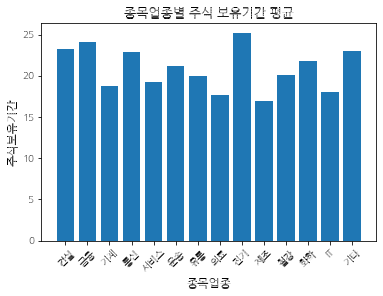

In [ ]:
plt.bar(['건설','금융','기계', '통신', '서비스', '운송', '유통', '의료', '전기', '제조', '철강', '화학', 'IT', '기타'], g10)
plt.title('종목업종별 주식 보유기간 평균', fontsize=13)
plt.xlabel('종목업종', fontsize=12)
plt.ylabel('주식보유기간', fontsize=12)
plt.xticks(rotation=45)
plt.show()

In [ ]:
#시가총액규모유형
grouped11 = df['hold_d'].groupby(df['mkt_pr_tal_scl_tp_cd'])

In [ ]:
g11 = grouped11.mean()
g11

# 01: 대형주
# 02: 중형주
# 03: 소형주
# 99: 기타

# 기타를 제외하고 대형주 - 소형주 - 중형주 순으로 보유기간이 길었다.

mkt_pr_tal_scl_tp_cd
1     21.806781
2     17.723997
3     18.832883
99    24.489067
Name: hold_d, dtype: float64

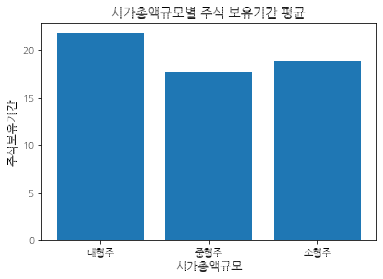

In [ ]:
plt.bar(['대형주','중형주','소형주'], g11[:-1])
plt.title('시가총액규모별 주식 보유기간 평균', fontsize=13)
plt.xlabel('시가총액규모', fontsize=12)
plt.ylabel('주식보유기간', fontsize=12)
plt.show()

In [ ]:
#시장구분
grouped12 = df['hold_d'].groupby(df['stk_dit_cd'])

In [ ]:
g12 = grouped12.mean()
g12

# 01: 코스피200
# 02: 코스닥150
# 99: 기타

#코스닥보단 코스피가 보유기간이 더 길었다.

stk_dit_cd
1     23.651185
2     17.527725
99    18.633837
Name: hold_d, dtype: float64

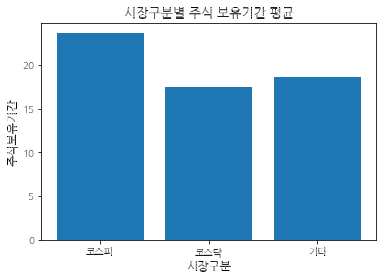

In [ ]:
plt.bar(['코스피','코스닥','기타'], g12)
plt.title('시장구분별 주식 보유기간 평균', fontsize=13)
plt.xlabel('시장구분', fontsize=12)
plt.ylabel('주식보유기간', fontsize=12)
plt.show()